![Movie popcorn on red background](redpopcorn.jpg)

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry. Our friend has also been brushing up on their Python skills and has taken a first crack at a CSV file containing Netflix data. They believe that the average duration of movies has been declining. Using your friends initial research, you'll delve into the Netflix data to see if you can determine whether movie lengths are actually getting shorter and explain some of the contributing factors, if any.

You have been supplied with the dataset `netflix_data.csv` , along with the following table detailing the column names and descriptions:

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [43]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Import csv
netflix_df = pd.read_csv('netflix_data.csv')
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


In [44]:
# Remove TV shows
netflix_subset = netflix_df[netflix_df['type'] != 'TV Show']

# Filtramos por columnas de interés
columns = ['title','country','genre','release_year','duration']
netflix_movies = netflix_subset[columns]
netflix_movies.head()

,title,country,genre,release_year,duration
1,7:19,Mexico,Dramas,2016,93
2,23:59,Singapore,Horror Movies,2011,78
3,9,United States,Action,2009,80
4,21,United States,Dramas,2008,123
6,122,Egypt,Horror Movies,2019,95


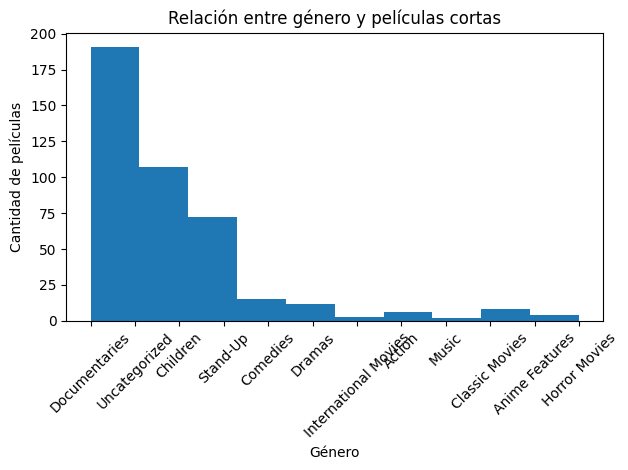

In [45]:
# Filtramos por películas que tienen duración menor a 60 minutos
short_movies = netflix_movies[netflix_movies['duration'] < 60]

# Analizamos si existe un patrón dentro de estas películas cortas
plt.hist(short_movies['genre'])
plt.xlabel('Género')
plt.ylabel('Cantidad de películas')
plt.title('Relación entre género y películas cortas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [46]:
print(short_movies['genre'].value_counts())

Documentaries           151
Children                107
Stand-Up                 72
Uncategorized            40
Comedies                 15
Dramas                   12
Classic Movies            8
Action                    6
International Movies      3
Anime Features            3
Music                     2
Horror Movies             1
Name: genre, dtype: int64


Vemos que existe una relación importante entre el género y la duración de la película. Ahora vamos a analizar los años

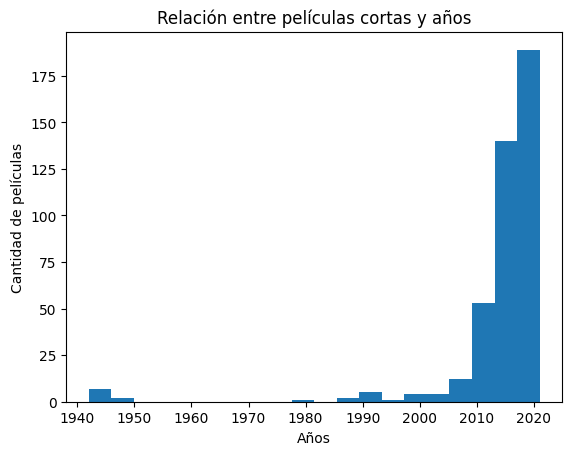

In [47]:
plt.hist(short_movies['release_year'],bins=20)
plt.xlabel('Años')
plt.ylabel('Cantidad de películas')
plt.title('Relación entre películas cortas y años')
plt.show()

In [48]:
print(short_movies['release_year'].value_counts())

2020    68
2017    64
2019    63
2018    55
2016    38
2013    22
2015    21
2014    17
2011    11
2012    11
2010     9
2008     8
1991     3
2021     3
1944     2
2004     2
1942     2
1945     2
1998     2
2006     2
2009     2
2003     1
1946     1
2000     1
2001     1
2005     1
1988     1
1993     1
1987     1
1978     1
1994     1
1947     1
1990     1
1943     1
Name: release_year, dtype: int64


Observamos la relación entre mayor cantidad de películas cortas a medida que avanzan los años. Sin embargo, esto puede deberse a múltiples razones, por lo que debemos continuar con nuestro análisis

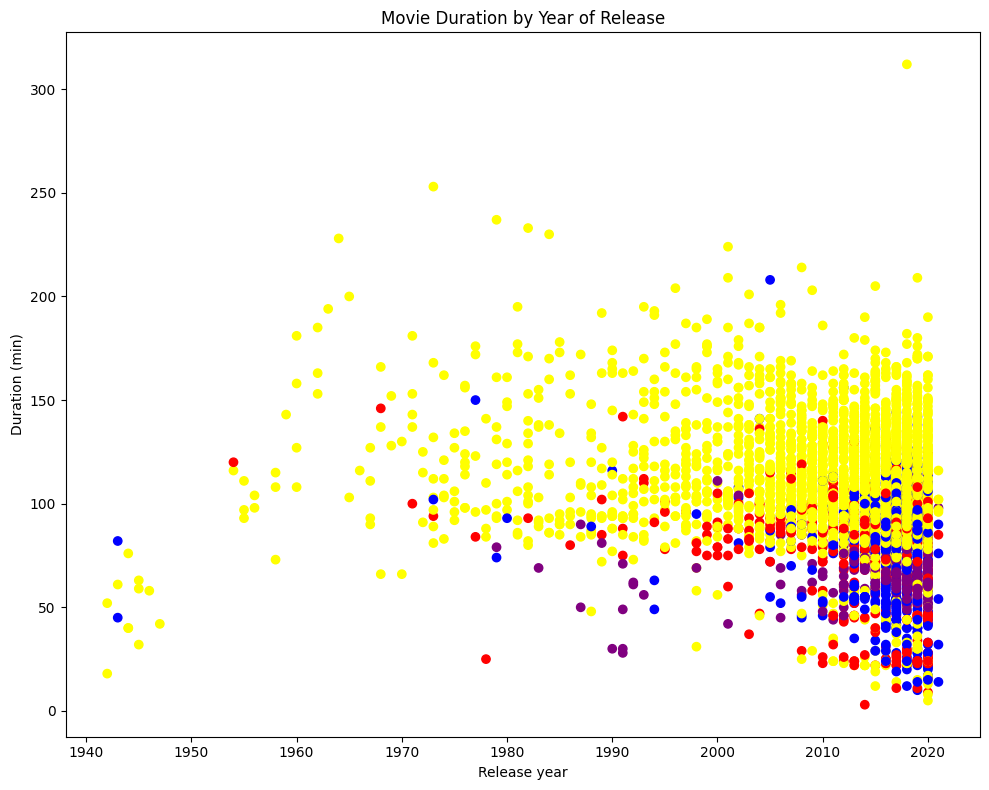

In [49]:
# Lista vacía 'colors'
colors = []

for index, row in netflix_movies.iterrows():
    if row['genre'] == 'Children':
        colors.append('red')
    elif row['genre'] == 'Documentaries':
        colors.append('blue')
    elif row['genre'] == 'Stand-Up':
        colors.append('purple')
    else:
        colors.append('yellow')
        
fig = plt.figure(figsize=(10,8))

# Create scatter plot
plt.scatter(netflix_movies['release_year'], netflix_movies['duration'], c=colors)
plt.xlabel('Release year')
plt.ylabel('Duration (min)')
plt.title('Movie Duration by Year of Release')
plt.tight_layout()
plt.show()

In [50]:
# Are we certain that movies are getting shorter?
answer = "maybe"